In [2]:
%matplotlib inline

In [51]:

#import numpy as np
#from getdata import load
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD
#from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K
#K.set_image_dim_ordering('th')

In [3]:
#path = "/home/saurabh/Documents/dogscats/"
path = "/home/saurabh/Documents/dogscats/sample/"
print(path)

/home/saurabh/Documents/dogscats/sample/


In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [5]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu0,floatX=float32,optimizer=fast_compile'

In [6]:
import utils; reload(utils)
from utils import plots


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.
Using Theano backend.


In [7]:
batch_size=64

In [8]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [9]:
def getlabels(predictions,T):
    #takes np array of class probs returns labels in multi label format
    labels = []
    for i in range(0, len(predictions[3])):

        if min(predictions[3][i] > T):
            labels.append('both')
        else:
            if predictions[3][i][0] > predictions[3][i][1]:
                labels.append('nucleus')
            else:
                labels.append('mito')
    #print (mylabels) 
    return labels
    

In [10]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


Found 270 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Epoch 1/1
270/270 [==============================] - 210s - loss: 1.3152 - acc: 0.5019 - val_loss: 0.9638 - val_acc: 0.5000


In [11]:
vgg = Vgg16()

In [12]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 270 images belonging to 2 classes.


In [13]:
imgs,labels = next(batches)

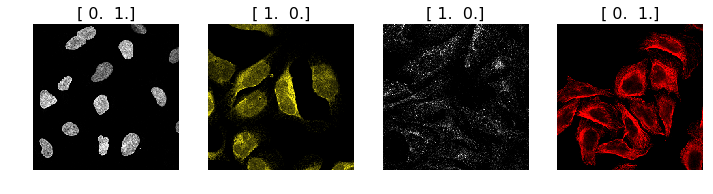

In [14]:
plots(imgs, titles=labels)

# Pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [15]:
vgg.predict(imgs, True)

[[ 0.3345  0.7988  0.7761 ...,  0.8475  0.8325  0.86  ]
 [ 0.53    0.924   0.1345 ...,  0.6896  0.8001  0.6383]
 [ 0.4472  0.6867  0.7531 ...,  0.1489  0.232   0.7102]
 [ 0.0085  0.9716  0.3554 ...,  0.0546  0.3501  0.8145]]


(array([ 0.9999,  0.998 ,  0.9958,  1.    ], dtype=float32),
 array([107, 937, 885, 980]),
 [u'jellyfish', u'broccoli', u'velvet', u'volcano'],
 array([[ 0.3345,  0.7988,  0.7761, ...,  0.8475,  0.8325,  0.86  ],
        [ 0.53  ,  0.924 ,  0.1345, ...,  0.6896,  0.8001,  0.6383],
        [ 0.4472,  0.6867,  0.7531, ...,  0.1489,  0.232 ,  0.7102],
        [ 0.0085,  0.9716,  0.3554, ...,  0.0546,  0.3501,  0.8145]], dtype=float32))

In [16]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

# Cyto2017

In [56]:
batch_size = 4

In [57]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 270 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


In [58]:
vgg.finetune(batches)

In [59]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
270/270 [==============================] - 202s - loss: 1.4029 - acc: 0.4815 - val_loss: 0.8856 - val_acc: 0.5274


In [60]:
imgs,labels = next(val_batches)

In [67]:
vgg.predict(imgs)

[[ 0.3973  0.4624]
 [ 0.2452  0.8472]
 [ 0.6437  0.7015]
 [ 0.5202  0.5779]]


(array([ 0.4624,  0.8472,  0.7015,  0.5779], dtype=float32),
 array([1, 1, 1, 1]),
 ['nucleas', 'nucleas', 'nucleas', 'nucleas'],
 array([[ 0.3973,  0.4624],
        [ 0.2452,  0.8472],
        [ 0.6437,  0.7015],
        [ 0.5202,  0.5779]], dtype=float32))

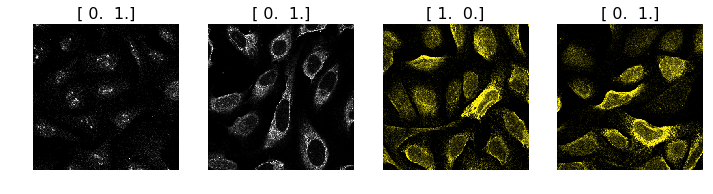

In [68]:
plots(imgs, titles=labels)

In [83]:
print(labels)

[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


# Next steps

In [69]:
predictions = vgg.predict(imgs)

[[ 0.3973  0.4624]
 [ 0.2452  0.8472]
 [ 0.6437  0.7015]
 [ 0.5202  0.5779]]


In [70]:
def getlabels(predictions,T):
    #takes np array of class probs returns labels in multi label format
    labels = []
    for i in range(0, len(predictions[3])):

        if min(predictions[3][i] > T):
            labels.append('both')
        else:
            if predictions[3][i][0] > predictions[3][i][1]:
                labels.append('nucleus')
            else:
                labels.append('mito')
    #print (mylabels) 
    return labels

In [71]:
mylabels  = getlabels(predictions, 0.4)
print (mylabels) 

['mito', 'mito', 'both', 'both']


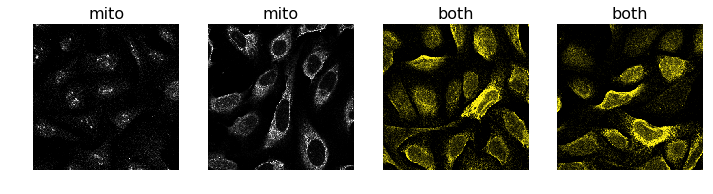

In [72]:
plots(imgs, titles=mylabels)

In [33]:
threshold = np.arange(0.1,0.9,0.1)
print(threshold)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8]


In [94]:
best_threshold = np.zeros(predictions[3].shape[1])
print(best_threshold)


[ 0.  0.]


In [118]:
acc = []
accuracies = []
threshold = np.arange(0.1,0.9,0.1)
best_threshold = np.zeros(predictions[3].shape[1])


for i in range(predictions[3].shape[1]): # [ 0.  0.]
    #predictions[3][:,0]  array([ 0.5658,  0.754 ,  0.6278,  0.365 ], dtype=float32)
    #predictions[3][:,1]  array([ 0.562 ,  0.468 ,  0.3903,  0.9322], dtype=float32)
    y_prob = np.array(predictions[3][:,i] )   # Probabilities for both classes
    for j in threshold: # 0.1 to 0.9
        y_pred = [1 if prob>=j else 0 for prob in y_prob]
        #print(y_pred)
        acc.append( matthews_corrcoef(labels[:,i],y_pred))
        #print(acc)
    acc   = np.array(acc)
    #print(acc[7])
    index = np.where(acc==acc.max()) 
    #print(index)
    accuracies.append(acc.max())
    #print(accuracies)
    best_threshold[i] = threshold[index[0][0]]
    acc = []



    

0.0
0.333333333333


In [106]:
best_threshold


array([ 0.6,  0.8])

In [107]:
y_pred = np.array([[1 if predictions[3][i,j]>=best_threshold[j] else 0 for j in range(labels.shape[1])] for i in range(len(labels))])

In [110]:
hamming_loss(labels,y_pred)

0.25

In [2]:
print(predictions[0])



def calc?labels*predictions
    for prediction in predictions*0(>)

    return new labels

NameError: name 'predictions' is not defined

In [42]:
col1 = predictions[0]
col2

In [46]:
for predictions in range(0, len(col1)) :
    if col1[predictions] > 0.70:
        col1[predictions] = 1
    else:
        col1[predictions] = 0
        

        print(col1)
       

[ 1.      0.      0.6717  1.    ]
[ 1.  0.  0.  1.]


In [44]:
col1

array([ 0.8831,  0.6467,  0.6717,  0.7696], dtype=float32)

In [65]:
predictions

(array([ 0.8831,  0.6467,  0.6717,  0.7696], dtype=float32),
 array([0, 1, 0, 0]),
 ['mito', 'nucleas', 'mito', 'mito'],
 array([[ 0.8831,  0.3254],
        [ 0.4664,  0.6467],
        [ 0.6717,  0.1724],
        [ 0.7696,  0.4561]], dtype=float32))

In [115]:
results = predictions[3].tolist()

In [108]:
print(results)

[[0.8831485509872437, 0.3253938555717468], [0.4664382338523865, 0.6466714143753052], [0.6717350482940674, 0.17239761352539062], [0.7696337699890137, 0.45609867572784424]]


In [120]:
def getlabels(predictions,T):
    #takes np array of class probs returns labels
    labels = []
    for i in range(0, len(predictions[3])):

        if min(predictions[3][i] > T):
            labels.append('both')
        else:
            if predictions[3][i][0] > predictions[3][i][1]:
                labels.append('nucleus')
            else:
                labels.append('mito')
    return labels
    
mylabels  = getlabels(predictions, 0.4)
print (mylabels)       
        
    

['nucleus', 'both', 'nucleus', 'both']


In [95]:
results[1]

[0.4664382338523865, 0.6466714143753052]

In [116]:
print(results)
for i in range(0, len(results)):
    for j in range(0, len(results[i])):
        #print (results[i][j])
        if results[i][j] > 0.4:
            results[i][j] = 1
        else:
            results[i][j] = 0

print(results)
        
        

[[0.8831485509872437, 0.3253938555717468], [0.4664382338523865, 0.6466714143753052], [0.6717350482940674, 0.17239761352539062], [0.7696337699890137, 0.45609867572784424]]
[[1, 0], [1, 1], [1, 0], [1, 1]]


In [103]:
results[1]

[0.4664382338523865, 0.6466714143753052]

In [156]:
predictions[predictions > 0.5] = 1

TypeError: 'tuple' object does not support item assignment

In [ ]:
preds[preds>=0.5] = 1


1] Update script for more stuff and to run on King3, Discuss about multilabel classification, replacing categorical cross entropy with binary cross entropy, and replacing softmax by sigmoid

2] Run on more epochs, get the latest weights, and use that model

3] Train on the complete dataset

4] Get the hold out set from competition when its released (1st June)

5] Submit predictions to the challenge

## Vgg16 from scratch


In [52]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image
print("Packages loaded")

Packages loaded


In [7]:
# Import the mappings from VGG ids to imagenet category ids and descriptions, for display purposes later.


In [12]:
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')

In [13]:
print(fpath)

/home/saurabh/.keras/models/imagenet_class_index.json


# converts the json into a dict of classes

In [15]:
with open(fpath) as f:
    class_dict = json.load(f)
    print(class_dict)

{u'344': [u'n02398521', u'hippopotamus'], u'0': [u'n01440764', u'tench'], u'346': [u'n02408429', u'water_buffalo'], u'347': [u'n02410509', u'bison'], u'340': [u'n02391049', u'zebra'], u'341': [u'n02395406', u'hog'], u'342': [u'n02396427', u'wild_boar'], u'343': [u'n02397096', u'warthog'], u'810': [u'n04264628', u'space_bar'], u'811': [u'n04265275', u'space_heater'], u'812': [u'n04266014', u'space_shuttle'], u'813': [u'n04270147', u'spatula'], u'348': [u'n02412080', u'ram'], u'349': [u'n02415577', u'bighorn'], u'816': [u'n04277352', u'spindle'], u'817': [u'n04285008', u'sports_car'], u'595': [u'n03496892', u'harvester'], u'719': [u'n03935335', u'piggy_bank'], u'718': [u'n03933933', u'pier'], u'717': [u'n03930630', u'pickup'], u'716': [u'n03930313', u'picket_fence'], u'715': [u'n03929855', u'pickelhaube'], u'714': [u'n03929660', u'pick'], u'713': [u'n03924679', u'photocopier'], u'712': [u'n03920288', u'Petri_dish'], u'711': [u'n03916031', u'perfume'], u'710': [u'n03908714', u'pencil_shar

# converts dictionary with strinng indexes into a array

In [33]:
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [35]:
classes[:5]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']

# Create model architecture| (Conv  and FC layers)

In [57]:
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3,3, activation= 'relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [58]:
def FCBlock(model):
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))

In [69]:
vgg_mean = np.array([123.68, 116.779, 103.939])

In [60]:
print(vgg_mean)

[ 123.68   116.779  103.939]


In [71]:
vgg_mean.reshape((3,1,1))

array([[[ 123.68 ]],

       [[ 116.779]],

       [[ 103.939]]])

In [79]:
def vgg_preprocess(x):
    x = x- vgg_mean
    print(x)
    return x[:,::-1]

In [81]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))
    
    ConvBlock(2,model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)
    
    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

In [85]:
model = VGG_16()

Elemwise{sub,no_inplace}.0


In [86]:
fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

In [87]:
batch_size = 4

NameError: name 'ImageDataGenerator' is not defined

In [114]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [115]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)
imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

Found 270 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


In [117]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [118]:
pred_batch(imgs)

ValueError: Input dimension mis-match. (input[0].shape[3] = 224, input[1].shape[3] = 3)
Apply node that caused the error: Elemwise{sub,no_inplace}(lambda_input_4, TensorConstant{[[[[ 123.6..03.939]]]]})
Toposort index: 28
Inputs types: [TensorType(float32, 4D), TensorType(float64, (True, True, True, False))]
Inputs shapes: [(4, 3, 224, 224), (1, 1, 1, 3)]
Inputs strides: [(602112, 200704, 896, 4), (24, 24, 24, 8)]
Inputs values: ['not shown', array([[[[ 123.68 ,  116.779,  103.939]]]])]
Outputs clients: [[Subtensor{::, ::int64}(Elemwise{sub,no_inplace}.0, Constant{-1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "<ipython-input-81-eac81535e90a>", line 3, in VGG_16
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/models.py", line 280, in add
    layer.create_input_layer(batch_input_shape, input_dtype)
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/engine/topology.py", line 370, in create_input_layer
    self(x)
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/engine/topology.py", line 514, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/engine/topology.py", line 572, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/engine/topology.py", line 149, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/home/saurabh/anaconda3/envs/fastai/lib/python2.7/site-packages/keras/layers/core.py", line 556, in call
    return self.function(x, **arguments)
  File "<ipython-input-79-d742c323b7ee>", line 2, in vgg_preprocess
    x = x- vgg_mean

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.